# Класифікація обʼєктів новобудови за текстовим описом за допомогою зворотної нейронної мережі

Рекурсивна нейронна мережа використовується для наборів даних які представляють собою серію послідовних даних. Наприклад, опис обʼєкту нерухомості є текстовою строкою. Кожний символ повʼязаний із попередніми символами та із наступними. Через це використання звичайної нейронної мережі є неможливим при роботі із текстом.

Натомість, для цього використовуються Рекурсивні Нейронні Мережі.

https://www.youtube.com/watch?v=VtRLrQ3Ev-U&ab_channel=freeCodeCamp.org

In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from keras.models import Sequential
from keras.layers import Dense, Dropout, TextVectorization, Embedding, LSTM
from keras.optimizers import Adam
from keras.utils import to_categorical
# BinaryCrossentropy функція повинна використовуватися для задач бінарної класифікації. Для мультикласової класифікації потрібно використовувати CategoricalCrossentropy
# from keras.losses import BinaryCrossentropy
from keras.losses import CategoricalCrossentropy
from sklearn.model_selection import train_test_split

## Завантаження набору даних

### Ознайомлення з набором даних

In [233]:
df = pd.read_csv('./translated-1677270280197.csv', usecols=['residence', 'developer', 'price', 'attributes/class', 'description'])

In [234]:
df.head()

,residence,developer,attributes/class,description,price
0,ЖК Greenville на Печерську,Greenville,бізнес,Greenville is a combination of residential spa...,4138800.0
1,Linden Luxury Residences,Budhouse Group,преміум,The location of Linden Luxury Residences is th...,1709400.0
2,БФК OLEGIVSKIY,DIM,бізнес,OLEGIVSKIY is an exclusive business class mult...,3856325.0
3,ЖК Новий Автограф,DIM,комфорт,"Between both buildings of the ""New Autograph"" ...",3269700.0
4,NaN,NaN,NaN,NaN,NaN


In [235]:
df.sample()

,residence,developer,attributes/class,description,price
94,Kub29,Ковальська,комфорт,Kub29 is a unique project with non-standard cu...,2482350.0


In [236]:
df.shape

(100, 5)

### Фільтрація пустих значень

In [237]:
df = df.dropna(subset=['attributes/class', 'description'])

### Доступні в наборі даних класи нерухомості

In [238]:
df['attributes/class'].unique()

array(['бізнес', 'преміум', 'комфорт', 'економ'], dtype=object)

In [239]:
df.head()

,residence,developer,attributes/class,description,price
0,ЖК Greenville на Печерську,Greenville,бізнес,Greenville is a combination of residential spa...,4138800.0
1,Linden Luxury Residences,Budhouse Group,преміум,The location of Linden Luxury Residences is th...,1709400.0
2,БФК OLEGIVSKIY,DIM,бізнес,OLEGIVSKIY is an exclusive business class mult...,3856325.0
3,ЖК Новий Автограф,DIM,комфорт,"Between both buildings of the ""New Autograph"" ...",3269700.0
5,БФК А136 Highlight Tower,DIM,бізнес,Residential complex A136 Highlight Tower is a ...,6635250.0


### Переведення класів нерухомості до числових значень

In [240]:
class_to_num_map = { 'бізнес': 0, 'преміум': 1, 'комфорт': 2, 'економ': 3 }

df['class'] = df['attributes/class'].map(class_to_num_map)

In [241]:
df = df[['description', 'class']]

In [242]:
df.head()

,description,class
0,Greenville is a combination of residential spa...,0
1,The location of Linden Luxury Residences is th...,1
2,OLEGIVSKIY is an exclusive business class mult...,0
3,"Between both buildings of the ""New Autograph"" ...",2
5,Residential complex A136 Highlight Tower is a ...,0


## Підготовка даних для тренування моделі

### Створення сету характеристик і міток

TODO: використання imblearn.oversampling -> RandomOverSampler для прирівнювання к-сті зразків певного класу

In [243]:
train, val, test = np.split(df.sample(frac=1), [int(0.8 * len(df)), int(0.9 * len(df))])

In [244]:
train.shape, val.shape, test.shape

((70, 2), (9, 2), (9, 2))

In [245]:
df.head()

,description,class
0,Greenville is a combination of residential spa...,0
1,The location of Linden Luxury Residences is th...,1
2,OLEGIVSKIY is an exclusive business class mult...,0
3,"Between both buildings of the ""New Autograph"" ...",2
5,Residential complex A136 Highlight Tower is a ...,0


### Переведення міток до категоріальних значень

Так як мітки в даному випадку варіюються від 1 до 4 що вказує на певний клас будівлі, для того щоб повʼязати ці числа із виходом із softmax вихідного шару нейронної мережі, потрібно перевести числа до категоріального виду використовуюючи допоміжні функції keras.

In [246]:
x_train = train['description'].values
y_train = to_categorical(train['class'], 4)

x_valid = val['description'].values
y_valid = to_categorical(val['class'], 4)

x_test = test['description'].values
y_test = to_categorical(test['class'], 4)

x_pred = ['There is nothing good in this residential complex, please omit it']
y_pred = to_categorical([0], 4)

### Композиція моделі

In [247]:
model = Sequential()

model.add(hub_layer)
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [248]:
model.compile(optimizer=Adam(learning_rate=0.001), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [249]:
model.evaluate(x_train, y_train)

3/3 [==============================] - 1s 165ms/step - loss: 1.2515 - accuracy: 0.3000


[1.2515429258346558, 0.30000001192092896]

### Тренування моделі

Попередньо модель була натренована на 10-20 епохах, але цього було недостатньо. Після 10-20 епох точність моделі все ще зростає і модель не переходить в режим Overfitting

In [250]:
history = model.fit(x=x_train, y=y_train, epochs=30, validation_data=(x_valid, y_valid))

Epoch 1/30
3/3 [==============================] - 3s 911ms/step - loss: 1.2291 - accuracy: 0.3000 - val_loss: 1.1189 - val_accuracy: 0.3333
Epoch 2/30
3/3 [==============================] - 2s 703ms/step - loss: 1.1292 - accuracy: 0.3143 - val_loss: 1.0220 - val_accuracy: 0.2222
Epoch 3/30
3/3 [==============================] - 2s 690ms/step - loss: 1.0629 - accuracy: 0.3571 - val_loss: 0.9618 - val_accuracy: 0.3333
Epoch 4/30
3/3 [==============================] - 2s 684ms/step - loss: 1.0151 - accuracy: 0.5286 - val_loss: 0.9095 - val_accuracy: 0.4444
Epoch 5/30
3/3 [==============================] - 2s 689ms/step - loss: 0.9662 - accuracy: 0.6143 - val_loss: 0.8597 - val_accuracy: 0.5556
Epoch 6/30
3/3 [==============================] - 2s 757ms/step - loss: 0.9235 - accuracy: 0.6857 - val_loss: 0.8132 - val_accuracy: 0.5556
Epoch 7/30
3/3 [==============================] - 2s 752ms/step - loss: 0.8802 - accuracy: 0.7429 - val_loss: 0.7729 - val_accuracy: 0.6667
Epoch 8/30
3/3 [====

### Результати тренування моделі

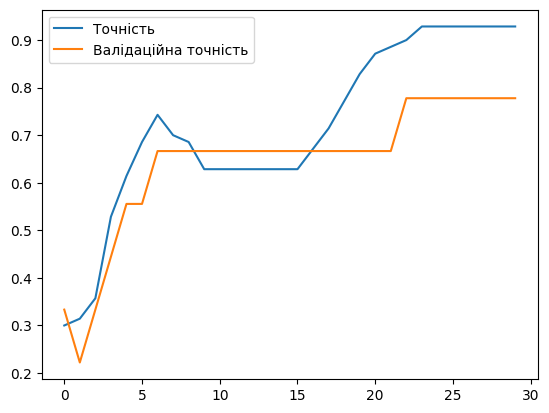

In [251]:
plt.plot(history.history['accuracy'], label="Точність")
plt.plot(history.history['val_accuracy'], label="Валідаційна точність")
plt.legend()

plt.show()

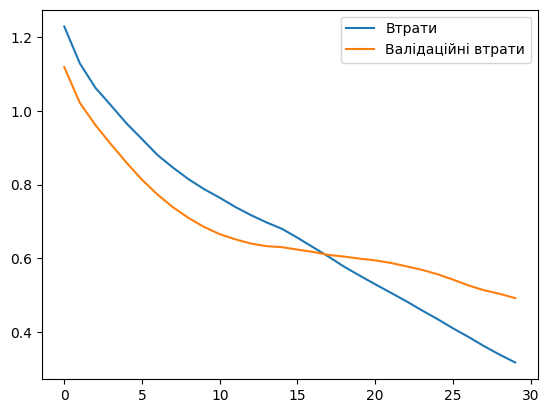

In [252]:
plt.plot(history.history['loss'], label="Втрати")
plt.plot(history.history['val_loss'], label="Валідаційні втрати")
plt.legend()

plt.show()

## Перевірка моделі на тестових даних яких раніше модель не бачила

In [253]:
def pred_to_text(pred):
    return list(class_to_num_map.keys())[list(class_to_num_map.values()).index(pred)]

In [254]:
pred_to_text(0), pred_to_text(1), pred_to_text(2), pred_to_text(3)

('бізнес', 'преміум', 'комфорт', 'економ')

In [255]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 135ms/step - loss: 1.3904 - accuracy: 0.6667


[1.3904343843460083, 0.6666666865348816]

In [256]:
pred = model.predict(x_pred)
pred_index = np.argmax(pred)

pred_to_text(pred_index)

1/1 [==============================] - 0s 195ms/step


'комфорт'

TODO: also use LSTM https://www.youtube.com/watch?v=VtRLrQ3Ev-U&ab_channel=freeCodeCamp.org

## LSTM модель

In [258]:
encoder = TextVectorization(max_tokens=2000)

In [260]:
x_train[0]

'The 4 Seasons residential complex in Kyiv is a modern monolithic frame new building, represented by two sections with a height of 23-25 \u200b\u200bfloors. For those who have decided to buy an apartment in the 4 Seasons residential complex in Kyiv from the developer UMK, we recommend visiting the official website of the complex to learn more about the current price level and actual layouts of the apartments, and to see photos of the construction. We have accurate data on the construction stage in our catalog. The general plan includes the availability of 1-3-room apartments, as well as two-story apartments with free planning decisions. The buildings are connected to centralized heat and electricity supply systems, water and sewerage. The developer also guarantees the provision of communications - telephone, TV, radio. Fire alarms will work in new buildings. Apartments for sale in the residential complex 4 seasons on the street. Trutenko, 3g is conducted on the terms of the developer c

In [261]:
encoder.adapt(x_train)

In [263]:
encoder.get_vocabulary()

['',
 '[UNK]',
 'the',
 'and',
 'of',
 'a',
 'to',
 'in',
 'is',
 'complex',
 'for',
 'with',
 'will',
 'are',
 'minutes',
 'on',
 'be',
 'no',
 'residential',
 'you',
 'there',
 'by',
 'from',
 'can',
 'center',
 'which',
 'an',
 'area',
 'school',
 'park',
 'car',
 'sports',
 'infrastructure',
 'or',
 'apartments',
 'new',
 'also',
 'city',
 'walk',
 'shopping',
 'childrens',
 'fitness',
 'buildings',
 'it',
 'kindergarten',
 'house',
 'residents',
 'nearby',
 'kyiv',
 'away',
 'territory',
 'as',
 'located',
 'floors',
 'at',
 'district',
 'building',
 'areas',
 'parking',
 'where',
 'within',
 '10',
 'shops',
 'near',
 'kindergartens',
 'foot',
 'schools',
 'metro',
 'first',
 'children',
 'station',
 'open',
 'club',
 'walking',
 'project',
 'built',
 'own',
 'not',
 'its',
 'have',
 '15',
 'other',
 '—',
 'windows',
 'drive',
 'that',
 'construction',
 'cars',
 'apartment',
 'transport',
 'take',
 'restaurants',
 'recreation',
 'modern',
 'has',
 'centers',
 'provided',
 'large',

In [266]:
best_practice_lstm_output_dim = 32

model_lstm = Sequential([
    encoder,
    Embedding(input_dim=len(encoder.get_vocabulary()), output_dim=best_practice_lstm_output_dim, mask_zero=True),
    LSTM(best_practice_lstm_output_dim),
    Dense(units=best_practice_lstm_output_dim),
    Dense(units=4, activation="softmax")
])

In [267]:
model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [269]:
model_lstm.evaluate(x_train, y_train)

3/3 [==============================] - 3s 36ms/step - loss: 1.3848 - accuracy: 0.3571


[1.3848017454147339, 0.3571428656578064]

In [270]:
history_lstm = model_lstm.fit(x=x_train, y=y_train, epochs=30, validation_data=(x_valid, y_valid))

Epoch 1/30
3/3 [==============================] - 3s 176ms/step - loss: 1.3806 - accuracy: 0.4857 - val_loss: 1.3573 - val_accuracy: 0.6667
Epoch 2/30
3/3 [==============================] - 1s 191ms/step - loss: 1.3539 - accuracy: 0.6000 - val_loss: 1.3268 - val_accuracy: 0.6667
Epoch 3/30
3/3 [==============================] - 1s 173ms/step - loss: 1.3233 - accuracy: 0.6000 - val_loss: 1.2845 - val_accuracy: 0.6667
Epoch 4/30
3/3 [==============================] - 0s 153ms/step - loss: 1.2800 - accuracy: 0.6000 - val_loss: 1.2206 - val_accuracy: 0.6667
Epoch 5/30
3/3 [==============================] - 1s 170ms/step - loss: 1.2176 - accuracy: 0.6000 - val_loss: 1.1133 - val_accuracy: 0.6667
Epoch 6/30
3/3 [==============================] - 1s 196ms/step - loss: 1.1049 - accuracy: 0.6000 - val_loss: 0.9235 - val_accuracy: 0.6667
Epoch 7/30
3/3 [==============================] - 1s 257ms/step - loss: 0.9833 - accuracy: 0.6000 - val_loss: 0.7817 - val_accuracy: 0.6667
Epoch 8/30
3/3 [====

In [271]:
model_lstm.evaluate(x_test, y_test)

1/1 [==============================] - 0s 49ms/step - loss: 2.5329 - accuracy: 0.4444


[2.5329060554504395, 0.4444444477558136]